In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


df = pd.read_csv(r'C:\Users\Cheryl\Downloads\archive\movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Data clean-up

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
print(df.dtypes)


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<Axes: >

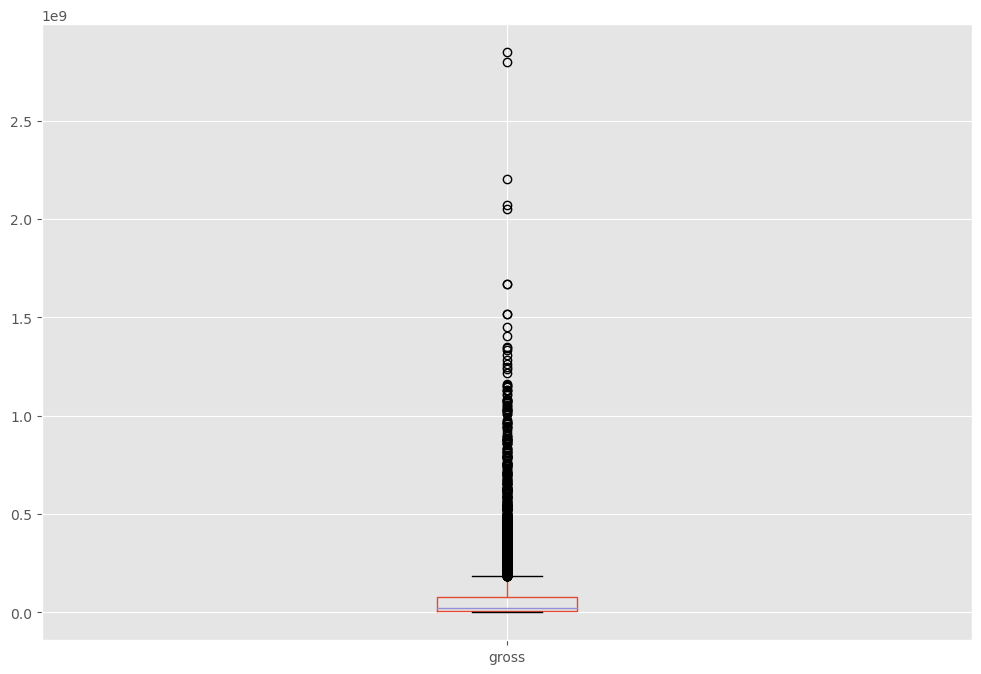

In [7]:
# Checking for Outliers

df.boxplot(column=['gross'])

In [8]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [9]:
# Sort data to see what insights can be drawn

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


<Axes: xlabel='gross', ylabel='budget'>

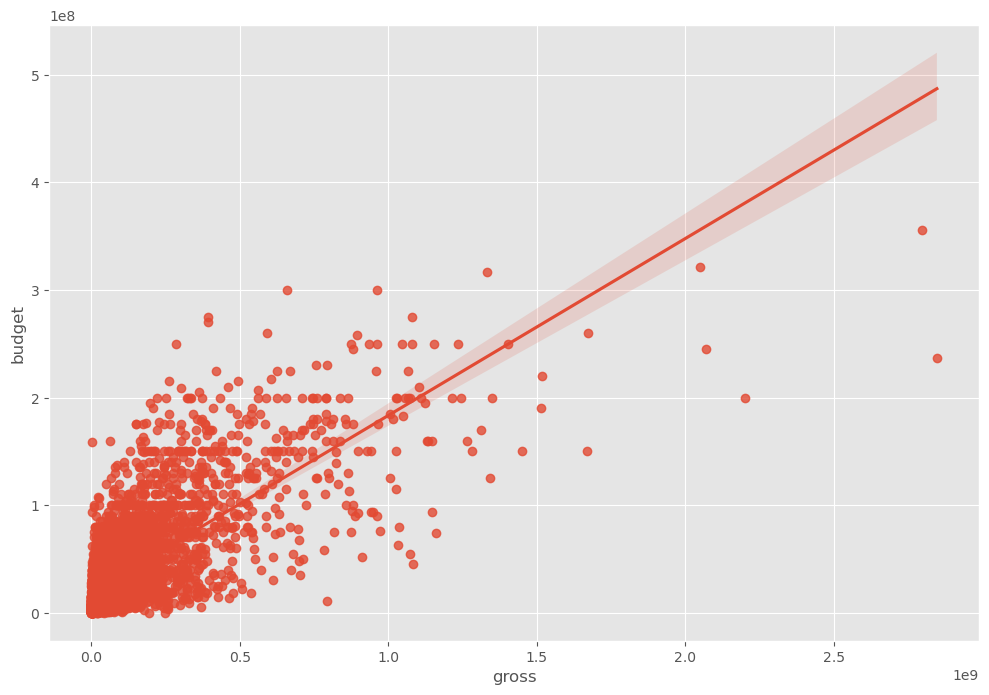

In [11]:
sns.regplot(x="gross", y="budget", data=df)


<Axes: xlabel='score', ylabel='gross'>

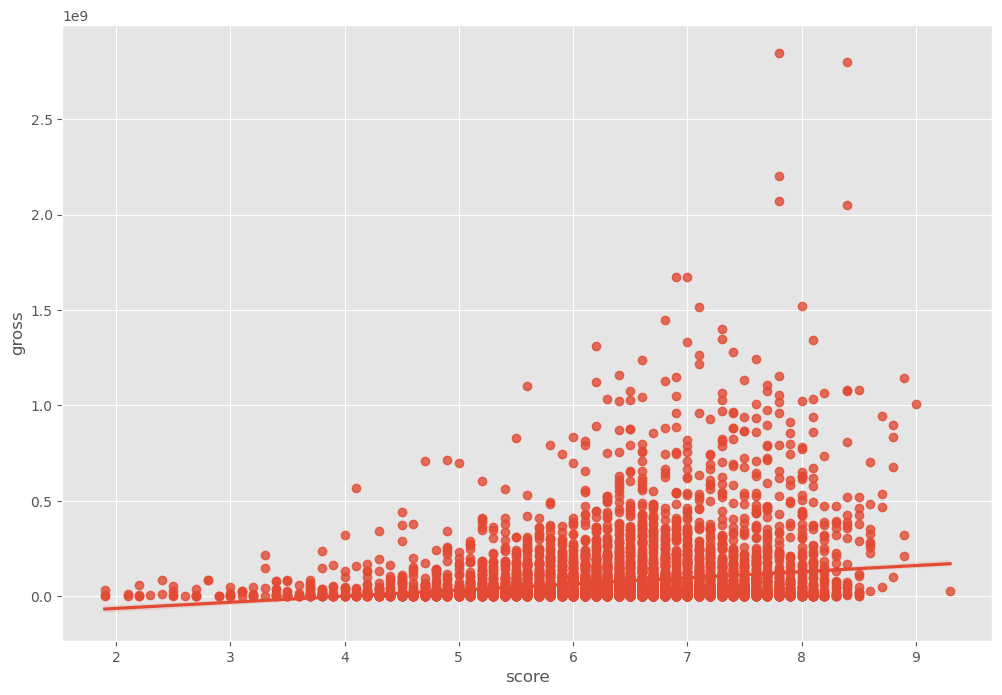

In [12]:
sns.regplot(x="score", y="gross", data=df)


In [23]:
# Correlation Matrix between all numeric columns

df.corr(numeric_only=True, method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.256331,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.169406,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.573889,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.687124,0.269510
gross,0.256331,0.169406,0.573889,0.687124,1.000000,0.204177
runtime,0.120811,0.399451,0.309212,0.269510,0.204177,1.000000


In [25]:
df.corr(numeric_only=True, method ='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.209304,0.215943,0.097184
score,0.067652,1.000000,0.300115,-0.005194,0.089155,0.283611
votes,0.331465,0.300115,1.000000,0.439902,0.558565,0.198240
budget,0.209304,-0.005194,0.439902,1.000000,0.540326,0.176016
gross,0.215943,0.089155,0.558565,0.540326,1.000000,0.175355
runtime,0.097184,0.283611,0.198240,0.176016,0.175355,1.000000


In [27]:
df.corr(numeric_only=True, method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.291152,0.313716,0.142977
score,0.099045,1.000000,0.428138,-0.007500,0.130397,0.399857
votes,0.469829,0.428138,1.000000,0.604627,0.749942,0.290159
budget,0.291152,-0.007500,0.604627,1.000000,0.714457,0.246748
gross,0.313716,0.130397,0.749942,0.714457,1.000000,0.254471
runtime,0.142977,0.399857,0.290159,0.246748,0.254471,1.000000


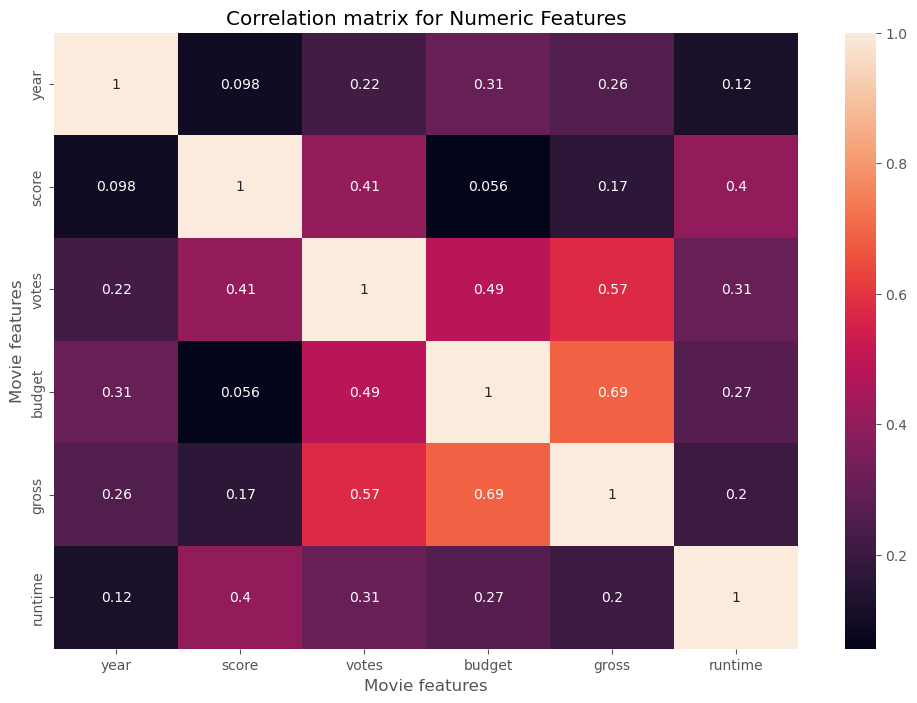

In [29]:
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [37]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Company,Company_A,Company_B
name,1.000000,0.143094,0.031953,0.965203,0.959315,-0.041478,0.284439,0.743578,0.801538,0.729960,0.152811,0.272487,0.965254,0.595797,0.045565,0.595797,NaN,NaN
rating,0.143094,1.000000,-0.081685,0.156473,0.145223,0.013380,0.099046,0.087490,0.105165,0.097033,0.014204,0.191459,0.153166,-0.024672,0.036474,-0.024672,NaN,NaN
genre,0.031953,-0.081685,1.000000,0.033758,0.032257,-0.006677,0.021869,0.043267,0.028524,0.035276,-0.021250,0.061358,0.034227,0.007297,0.003410,0.007297,NaN,NaN
year,0.965203,0.156473,0.033758,1.000000,0.993563,-0.039538,0.309352,0.768131,0.821667,0.754802,0.149644,0.297366,0.998875,0.605164,0.047870,0.605164,NaN,NaN
released,0.959315,0.145223,0.032257,0.993563,1.000000,-0.040269,0.296267,0.769235,0.816563,0.754347,0.156932,0.281089,0.994050,0.612206,0.044341,0.612206,NaN,NaN
score,-0.041478,0.013380,-0.006677,-0.039538,-0.040269,1.000000,-0.004147,-0.020826,-0.030289,-0.003660,0.035414,-0.011846,-0.038015,-0.023062,0.032825,-0.023062,NaN,NaN
votes,0.284439,0.099046,0.021869,0.309352,0.296267,-0.004147,1.000000,0.182316,0.217268,0.170507,-0.045578,0.394921,0.296289,0.003747,0.109896,0.003747,NaN,NaN
director,0.743578,0.087490,0.043267,0.768131,0.769235,-0.020826,0.182316,1.000000,0.746280,0.680895,0.165335,0.098292,0.770307,0.555382,-0.017851,0.555382,NaN,NaN
writer,0.801538,0.105165,0.028524,0.821667,0.816563,-0.030289,0.217268,0.746280,1.000000,0.673078,0.170695,0.180681,0.822181,0.547618,0.028277,0.547618,NaN,NaN
star,0.729960,0.097033,0.035276,0.754802,0.754347,-0.003660,0.170507,0.680895,0.673078,1.000000,0.191189,0.101262,0.756032,0.532684,0.031346,0.532684,NaN,NaN


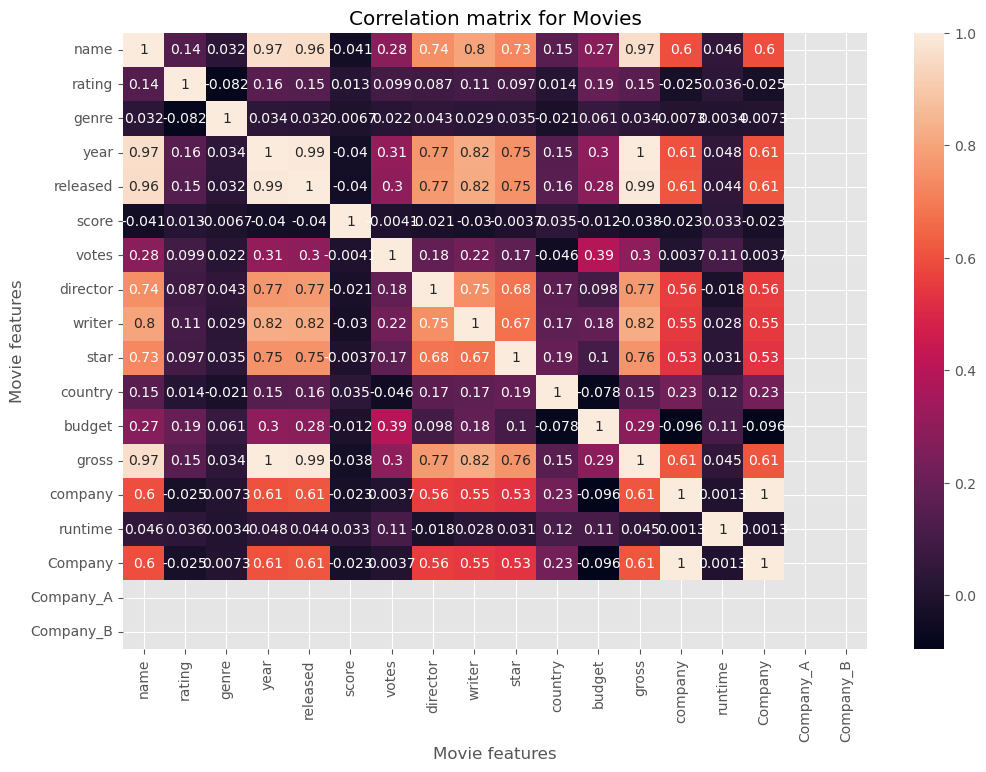

In [38]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [62]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr(numeric_only=True)

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name  name         1.000000
      rating       0.153822
      genre        0.031953
      year         0.965203
      released     0.959315
                     ...   
Year  runtime     -0.036938
      Company      0.055037
      Company_A         NaN
      Company_B         NaN
      Year         1.000000
Length: 361, dtype: float64


In [63]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

budget     Company     -0.095790
Company    budget      -0.095790
company    budget      -0.095790
budget     company     -0.095790
genre      rating      -0.088044
                          ...   
Company_B  Company_A         NaN
           Company_B         NaN
           Year              NaN
Year       Company_A         NaN
           Company_B         NaN
Length: 361, dtype: float64


In [64]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

Company  star       0.532684
company  star       0.532684
star     company    0.532684
         Company    0.532684
company  writer     0.548321
                      ...   
         company    1.000000
         Company    1.000000
runtime  runtime    1.000000
star     star       1.000000
Year     Year       1.000000
Length: 89, dtype: float64


In [42]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [45]:
df['Year'] = df['released'].astype(str).str[:4]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Company,Company_A,Company_B,Year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,Warner Bros.,0,0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,Columbia Pictures,0,0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,Lucasfilm,0,0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,Paramount Pictures,0,0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,Orion Pictures,0,0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,NaN,3661.0,Prowess Pictures,98.0,Prowess Pictures,0,0,Apri
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,NaN,240663149.0,Beijing Enlight Pictures,110.0,Beijing Enlight Pictures,0,0,Octo
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,NaN,413378.0,Pryor Entertainment,120.0,Pryor Entertainment,0,0,June
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,25818882.0,NaN,135.0,NaN,0,0,Sept


In [46]:
df.groupby(['company', 'year'])[["gross"]].sum()


gross
company                         year            
"DIA" Productions GmbH & Co. KG 1980         0.0
                                1981         0.0
                                1982         0.0
                                1983         0.0
                                1984         0.0
...                                          ...
thefyzz                         2016         0.0
                                2017  62198461.0
                                2018         0.0
                                2019         0.0
                                2020         0.0

[93316 rows x 1 columns]

In [47]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

In [48]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

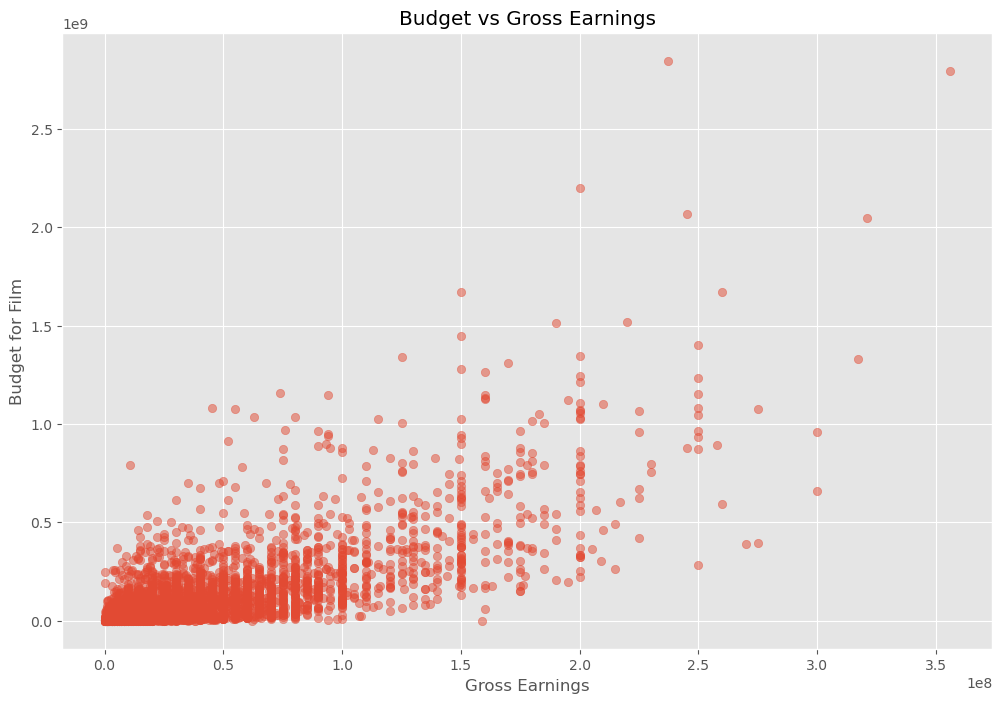

In [49]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [50]:
df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Company,Company_A,Company_B,Year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,Warner Bros.,0,0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,Columbia Pictures,0,0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,Lucasfilm,0,0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,Paramount Pictures,0,0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,Orion Pictures,0,0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,NaN,3661.0,Prowess Pictures,98.0,Prowess Pictures,0,0,Apri
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,NaN,240663149.0,Beijing Enlight Pictures,110.0,Beijing Enlight Pictures,0,0,Octo
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,NaN,413378.0,Pryor Entertainment,120.0,Pryor Entertainment,0,0,June
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,25818882.0,NaN,135.0,NaN,0,0,Sept


In [51]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Company,Company_A,Company_B,Year
0,6428,6,6,1980,1669,8.4,927000.0,2500,3890,994,52,19000000.0,46998772.0,Warner Bros.,146.0,Warner Bros.,0,0,13
1,5426,6,1,1980,1460,5.8,65000.0,2189,1578,313,53,4500000.0,58853106.0,Columbia Pictures,104.0,Columbia Pictures,0,0,12
2,5006,4,0,1980,1733,8.7,1200000.0,1072,2485,1666,53,18000000.0,538375067.0,Lucasfilm,124.0,Lucasfilm,0,0,13
3,280,4,4,1980,1460,7.7,221000.0,1260,1936,2146,53,3500000.0,83453539.0,Paramount Pictures,88.0,Paramount Pictures,0,0,12
4,1001,6,4,1980,1509,7.3,108000.0,1019,507,394,53,6000000.0,39846344.0,Orion Pictures,98.0,Orion Pictures,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,6321,6,5,2020,91,5.4,2400.0,2430,3760,2336,53,NaN,3661.0,Prowess Pictures,98.0,Prowess Pictures,0,0,7
7655,3105,9,2,2020,2748,6.6,1300.0,2620,-1,885,8,NaN,240663149.0,Beijing Enlight Pictures,110.0,Beijing Enlight Pictures,0,0,17
7656,6851,5,4,2020,1847,5.0,294.0,2425,3753,2276,53,NaN,413378.0,Pryor Entertainment,120.0,Pryor Entertainment,0,0,13
7657,3088,-1,6,2020,3205,6.7,903.0,2112,1932,870,8,NaN,25818882.0,NaN,135.0,NaN,0,0,18


In [53]:
df_numerized.corr(numeric_only=True,method='pearson')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,runtime,Company_A,Company_B,Year
name,1.000000,-0.006091,0.017885,0.007404,-0.011033,0.015473,0.011429,0.009092,0.008008,0.007278,-0.012027,0.023630,0.005557,0.009142,NaN,NaN,-0.012506
rating,-0.006091,1.000000,0.087325,0.012776,0.022026,0.002766,0.028082,0.014723,-0.006793,0.004774,0.066465,-0.187347,-0.107339,0.059870,NaN,NaN,0.018932
genre,0.017885,0.087325,1.000000,-0.082252,0.026804,0.046093,-0.149289,-0.016412,0.008231,-0.002322,-0.033283,-0.363257,-0.243059,-0.041023,NaN,NaN,0.024940
year,0.007404,0.012776,-0.082252,1.000000,0.002465,0.091821,0.215740,-0.019116,-0.008780,-0.032319,-0.084488,0.327781,0.257486,0.114706,NaN,NaN,0.000252
released,-0.011033,0.022026,0.026804,0.002465,1.000000,0.044301,0.018043,-0.002315,-0.002699,0.015812,-0.020083,0.018319,0.002341,0.000605,NaN,NaN,0.995717
score,0.015473,0.002766,0.046093,0.091821,0.044301,1.000000,0.413096,0.008810,0.018648,0.000310,-0.129474,0.071792,0.186258,0.397321,NaN,NaN,0.042872
votes,0.011429,0.028082,-0.149289,0.215740,0.018043,0.413096,1.000000,0.000919,0.000972,-0.021274,0.069934,0.440021,0.630757,0.309536,NaN,NaN,0.018509
director,0.009092,0.014723,-0.016412,-0.019116,-0.002315,0.008810,0.000919,1.000000,0.297601,0.036794,0.014435,-0.009593,-0.014490,0.016942,NaN,NaN,-0.001488
writer,0.008008,-0.006793,0.008231,-0.008780,-0.002699,0.018648,0.000972,0.297601,1.000000,0.023374,0.011871,-0.039188,-0.023574,-0.002816,NaN,NaN,-0.003428
star,0.007278,0.004774,-0.002322,-0.032319,0.015812,0.000310,-0.021274,0.036794,0.023374,1.000000,-0.016192,-0.020515,-0.002602,0.009227,NaN,NaN,0.015074


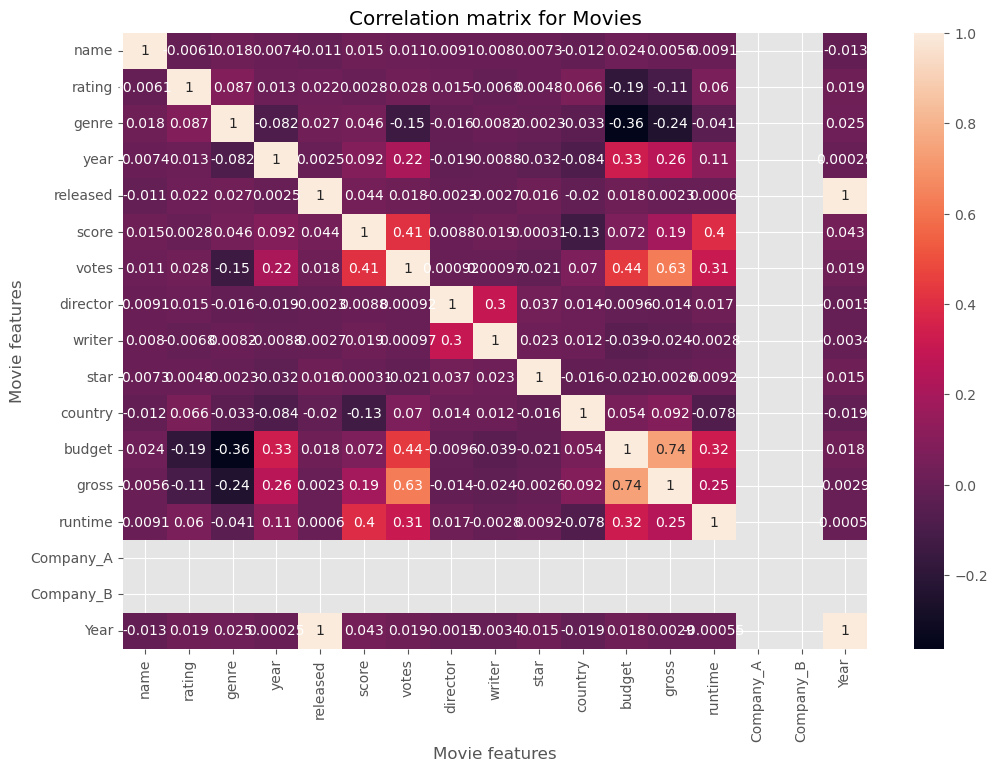

In [55]:
correlation_matrix = df_numerized.corr(numeric_only=True,method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()